In [17]:
import warnings
warnings.filterwarnings('ignore')
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [21]:
piano = 'generated_piano.mp3'
audio_data = 'rnn_piano.wav'

In [22]:
y, sry = librosa.load(piano)
x, sr = librosa.load(audio_data)

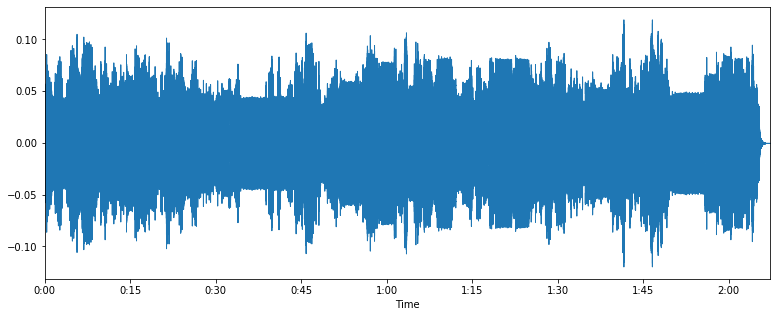

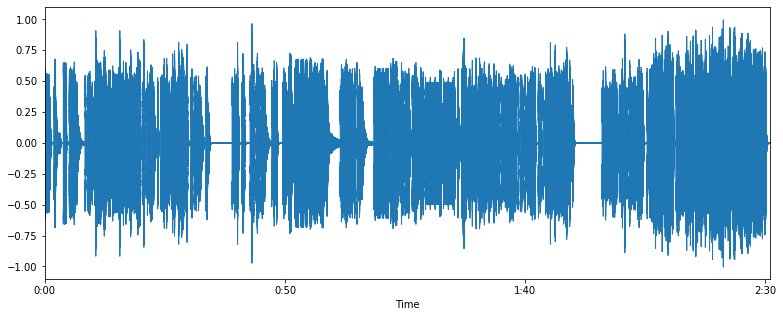

In [23]:
# plot the audio array
plt.figure(figsize = (13,5))
librosa.display.waveplot(y, sr = sry)
plt.show()

plt.figure(figsize = (13,5))
librosa.display.waveplot(x, sr = sr)
plt.show()

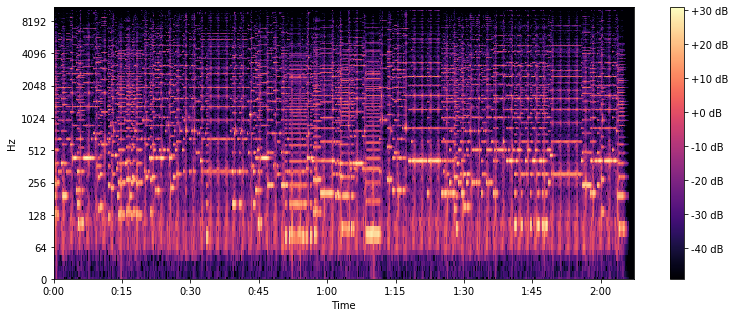

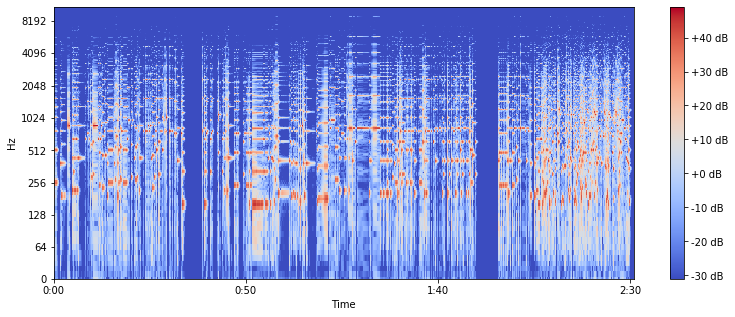

In [34]:
# spectogram - visual way of representing the signal strength, 
# or "loudness" of a signal over time at various frequencies present
# in a particular waveform (heatmap)

# stft converts data into short term Fourier transform

Y = librosa.stft(y)
ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(13, 5))
librosa.display.specshow(ydb, sr=sry, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(13, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

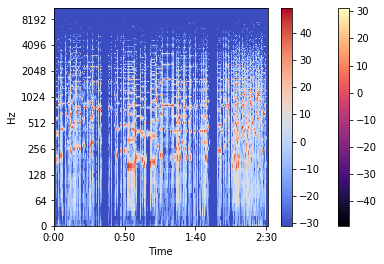

In [27]:
librosa.display.specshow(ydb, sr=sry, x_axis='time', y_axis='log')
plt.colorbar()

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

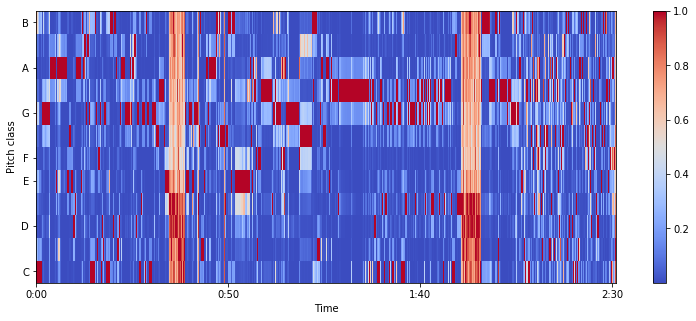

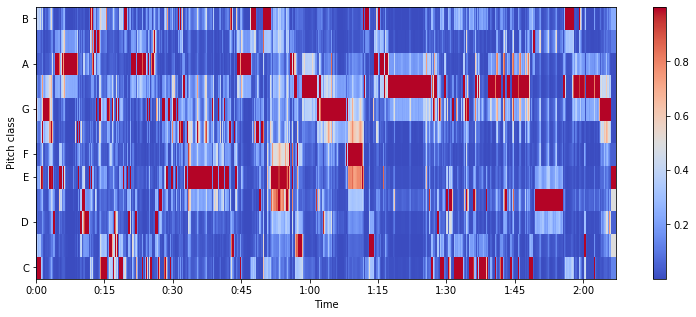

In [32]:
# chroma feature: 12-element feature vector indicating how much energy of each
# pitch class {C, C#, D, D#, E,..., B} is present in the signal
# similarity measure between music pieces

hop_length = 512

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(13, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

chromagram = librosa.feature.chroma_stft(y, sr=sry, hop_length=hop_length)
plt.figure(figsize=(13, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

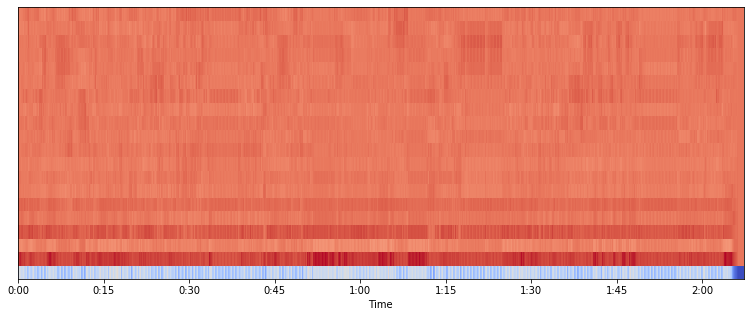

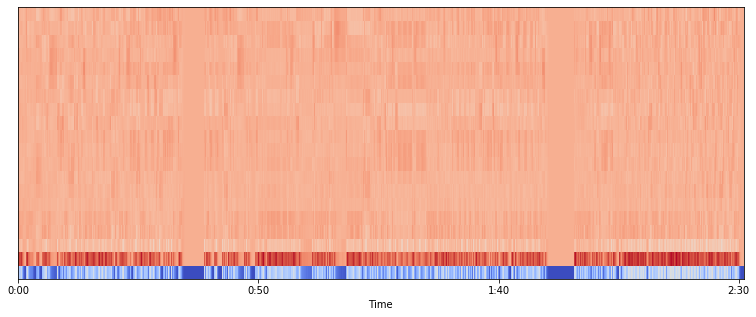

In [30]:
# MFCCs - Mel-Frequency Cepstral Coefficients of a signal are a small
# set of features (e.g. 10-20) which concisely describe the overall shape 
# of a spectral envelope

mfccs = librosa.feature.mfcc(y, sr=sry)
#Displaying  the MFCCs:
plt.figure(figsize=(13, 5))
librosa.display.specshow(mfccs, sr=sry, x_axis='time')

mfccsx = librosa.feature.mfcc(x, sr=sr)
#Displaying  the MFCCs:
plt.figure(figsize=(13, 5))
librosa.display.specshow(mfccsx, sr=sr, x_axis='time')